#***Carlos Gross-Martinez***
#***Reinforcement Learning***
#***Link to Google Collab Notebook***
#https://colab.research.google.com/drive/1KdquplysOb59Dc3W5rcKoIkwOzOEnz9b?usp=sharing

#***Pseudo Code***
#build the maze
#build q value table
#define start and end states, actions, and hyperparameters
#create a neural network as follows:
            5 inputs (4 actions + Bias)
            6 Nodes in hidden layer
            16 nodes in output layer (one for each state)
#define an initialize the weights
#define any variables to hold information per iteration
#create a function which select an action
#create a function to update q value table
#create a function to run the maze with Q leanring to update the Q table
#Create a fuinction that calculates feed forward operation
#create a function for the relu activation after feed forward
#create a function for backpropagation of weights between hidden and output
#create a function for backpropagation of weights between inpu and hidden
#create a function to calculate mse
#create code to print MSE and weights
#create a loop to train the model

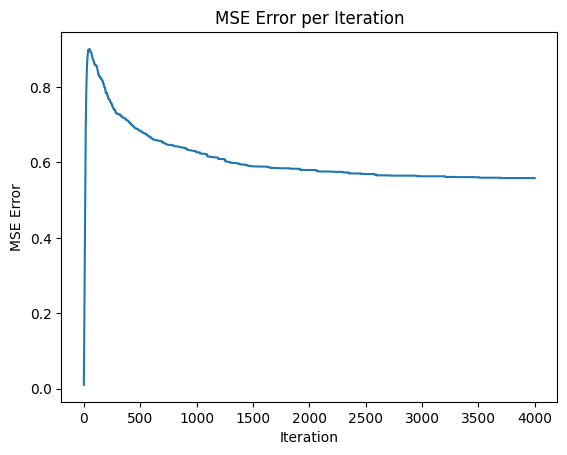

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

#create maze enviroment
maze = np.zeros((4, 4))

#initialization of start and end states
start_state = (0, 0)
goal_state = (3, 3)

#array with all actions in maze
actions = ['up', 'down', 'left', 'right']

#creating a q value table
q_values = np.zeros((4, 4, len(actions)))

#initialization of hyperparameters
alpha = 0.1  # learning rate
gamma = 0.9  # discount factor
epsilon = 0.1  # exploration rate

#building the neural network
input_layer_size = len(actions) + 1
hidden_layer_size = 6
output_layer_size = 16

#initializing the weights
weights_1 = np.random.randn(input_layer_size, hidden_layer_size)
weights_2 = np.random.randn(hidden_layer_size, output_layer_size)

#creating variables to hold values for plotting
mse_list = []
weight1_list = []
weight2_list = []

#function that selects an action
def select_action(state):
    if np.random.rand() < epsilon:
        #select a random action (exploration)
        action = np.random.choice(actions)
    else:
        #select the action with the highest Q-value (explotation)
        action_idx = np.argmax(q_values[state])
        action = actions[action_idx]
    return action

#function that updated Q values in table
def update_q_values(state, action, next_state, reward):
    #get the Q-value for the current state-action pair
    q_value = q_values[state][actions.index(action)]

    #get the maximum Q-value for the next state
    max_q_value = np.max(q_values[next_state])

    #calculate the target Q-value
    target_q_value = reward + gamma * max_q_value

    #update the Q-value for the current state-action pair
    q_values[state][actions.index(action)] = q_value + alpha * (target_q_value - q_value)

#function to run maze
def run_maze():
    #initialize the current state
    state = start_state
    mse = 0

    #loop until arrive in goal state
    while state != goal_state:

        action = select_action(state)

        #move to the next state
        if action == 'up':
            next_state = (state[0] - 1, state[1])
        elif action == 'down':
            next_state = (state[0] + 1, state[1])
        elif action == 'left':
            next_state = (state[0], state[1] - 1)
        else:
            next_state = (state[0], state[1] + 1)

        #check if the next state is valid or stay in the same state
        if next_state[0] < 0 or next_state[0] > 3 or next_state[1] < 0 or next_state[1] > 3:
            next_state = state

        #give reward
        if next_state == goal_state:
            reward = 1
        else:
            reward = 0

        #update Q table
        update_q_values(state, action, next_state, reward)

        #update to new state
        state = next_state

        #calculate error
        mse = np.mean((q_values - np.max(q_values)) ** 2)

    return mse, weights_1, weights_2

num_episodes = 4000

for episode in range(num_episodes):
    mse_temp, weight1_temp, weight2_temp = run_maze()
    mse_list.append(mse_temp)
    weight1_list.append(weight1_temp)
    weight2_list.append(weight2_temp)

weights_1_np = np.array(weight1_list)
weights_2_np = np.array(weight2_list)

#plot MSE
x = np.arange(0, 4000)
plt.plot(x, mse_list)
plt.xlabel('Iteration')
plt.ylabel('MSE Error')
plt.title('MSE Error per Iteration')
plt.show()

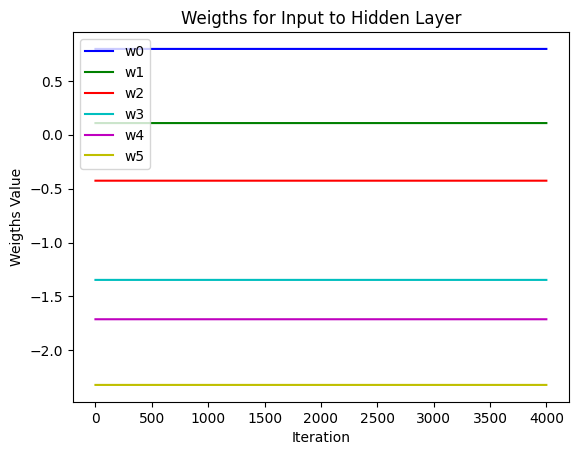

In [ ]:
#plot weights from input to hidden layer
plt.plot(x, weights_1_np[:, 0, 0], '-b', label ='w0')
plt.plot(x, weights_1_np[:, 0, 1], '-g', label = 'w1')
plt.plot(x, weights_1_np[:, 0, 2], '-r', label = 'w2')
plt.plot(x, weights_1_np[:, 0, 3], '-c', label = 'w3')
plt.plot(x, weights_1_np[:, 0, 4], '-m', label = 'w4')
plt.plot(x, weights_1_np[:, 0, 5], '-y', label = 'w5')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weigths for Input to Hidden Layer')
plt.legend(loc='upper left')
plt.show()

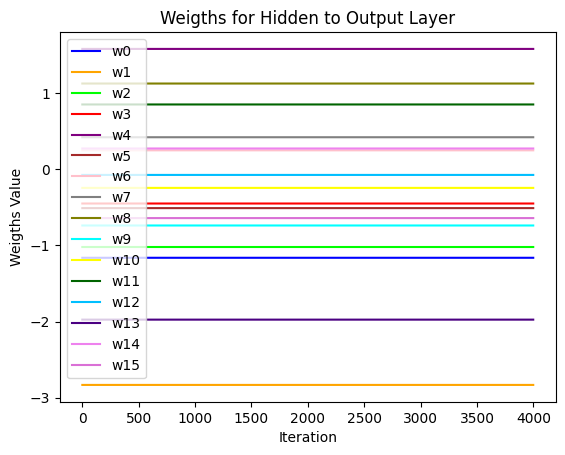

In [ ]:
#plot weights from hidden to output layer
plt.plot(x, weights_2_np[:, 0, 0], color = 'blue', label ='w0')
plt.plot(x, weights_2_np[:, 0, 1], color = 'orange', label = 'w1')
plt.plot(x, weights_2_np[:, 0, 2], color = 'lime', label = 'w2')
plt.plot(x, weights_2_np[:, 0, 3], color = 'red', label = 'w3')
plt.plot(x, weights_2_np[:, 0, 4], color = 'purple', label = 'w4')
plt.plot(x, weights_2_np[:, 0, 5], color = 'brown', label = 'w5')
plt.plot(x, weights_2_np[:, 0, 6], color = 'pink', label = 'w6')
plt.plot(x, weights_2_np[:, 0, 7], color = 'gray', label = 'w7')
plt.plot(x, weights_2_np[:, 0, 8], color = 'olive', label = 'w8')
plt.plot(x, weights_2_np[:, 0, 9], color = 'cyan', label = 'w9')
plt.plot(x, weights_2_np[:, 0, 10], color = 'yellow', label = 'w10')
plt.plot(x, weights_2_np[:, 0, 11], color = 'darkgreen', label = 'w11')
plt.plot(x, weights_2_np[:, 0, 12], color = 'deepskyblue', label = 'w12')
plt.plot(x, weights_2_np[:, 0, 13], color = 'indigo', label = 'w13')
plt.plot(x, weights_2_np[:, 0, 14], color = 'violet', label = 'w14')
plt.plot(x, weights_2_np[:, 0, 15], color = 'orchid', label = 'w15')
plt.xlabel('Iteration')
plt.ylabel('Weigths Value')
plt.title('Weigths for Hidden to Output Layer')
plt.legend(loc='upper left')
plt.show()